In [1]:
import os
import glob
import numpy as np
import xarray as xr
import rioxarray
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from matplotlib.cm import get_cmap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle
import cartopy

RegCM5_1km = xr.open_dataset('/mnt/data3/RegCM5/NewZealand-1km_SRF.2020011000.nc')
RegCM5_27km = xr.open_dataset('/mnt/data3/RegCM5/NewZealand-27km_SRF.2020011000.nc')

In [15]:
RegCM5_1km

<xarray.Dataset>
Dimensions:      (jx: 97, iy: 97, kz: 64, time: 12, m10: 1, m2: 1,
                  soil_layer: 10, m100: 1, bnds: 2)
Coordinates:
  * jx           (jx) float64 -4.8e+04 -4.7e+04 -4.6e+04 ... 4.7e+04 4.8e+04
  * iy           (iy) float64 -4.8e+04 -4.7e+04 -4.6e+04 ... 4.7e+04 4.8e+04
  * kz           (kz) float64 0.025 0.07385 0.1204 ... 0.9948 0.9969 0.999
    xlon         (iy, jx) float32 172.3 172.3 172.3 172.3 ... 173.1 173.1 173.1
    xlat         (iy, jx) float32 -43.89 -43.89 -43.89 ... -43.02 -43.02 -43.02
  * time         (time) datetime64[ns] 2020-01-10T06:00:00 ... 2020-01-13
  * m2           (m2) float64 2.0
  * m10          (m10) float64 10.0
    m100         (m10) float64 ...
  * soil_layer   (soil_layer) float64 0.007101 0.02793 0.06226 ... 1.728 2.865
Dimensions without coordinates: bnds
Data variables: (12/48)
    ptop         float64 ...
    mask         (iy, jx) float32 ...
    topo         (iy, jx) float32 3.031 2.194 0.0 0.0 ... 42.87 25.04 10.56
    areacella    (iy, jx) float32 ...
    ps           (time, iy, jx) float32 ...
    tau          (time, iy, jx) float32 ...
    ...           ...
    tsoil        (time, soil_layer, iy, jx) float32 ...
    ua100m       (time, m100, iy, jx) float32 ...
    va100m       (time, m100, iy, jx) float32 ...
    time_bnds    (time, bnds) datetime64[ns] ...
    crs          |S1 ...
    soil_bounds  (soil_layer, bnds) float64 ...
Attributes: (12/125)
    title:                                           ICTP Regional Climatic m...
    institution:                                     ICTP
    source:                                          RegCM Model output file
    executable_date:                                 Apr 27 2024
    Conventions:                                     CF-1.7
    references:                                      https://github.com/ICTP/...
    ...                                              ...
    holtslag_critical_ocean_richardson:              0.25
    holtslag_critical_land_richardson:               0.25
    holtslag_zhnew_factor:                           0.25
    holtslag_th10_estimate:                          2
    holtslag_th10_maximize:                          0
    holtslag_th10_niteration:                        1

In [2]:
print(RegCM5_1km)

<xarray.Dataset>
Dimensions:      (jx: 97, iy: 97, kz: 64, time: 12, m10: 1, m2: 1,
                  soil_layer: 10, m100: 1, bnds: 2)
Coordinates:
  * jx           (jx) float64 -4.8e+04 -4.7e+04 -4.6e+04 ... 4.7e+04 4.8e+04
  * iy           (iy) float64 -4.8e+04 -4.7e+04 -4.6e+04 ... 4.7e+04 4.8e+04
  * kz           (kz) float64 0.025 0.07385 0.1204 ... 0.9948 0.9969 0.999
    xlon         (iy, jx) float32 ...
    xlat         (iy, jx) float32 ...
  * time         (time) datetime64[ns] 2020-01-10T06:00:00 ... 2020-01-13
  * m2           (m2) float64 2.0
  * m10          (m10) float64 10.0
    m100         (m10) float64 ...
  * soil_layer   (soil_layer) float64 0.007101 0.02793 0.06226 ... 1.728 2.865
Dimensions without coordinates: bnds
Data variables: (12/48)
    ptop         float64 ...
    mask         (iy, jx) float32 ...
    topo         (iy, jx) float32 ...
    areacella    (iy, jx) float32 ...
    ps           (time, iy, jx) float32 ...
    tau          (time, iy, jx) float32 

/opt/conda/envs/baseline/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


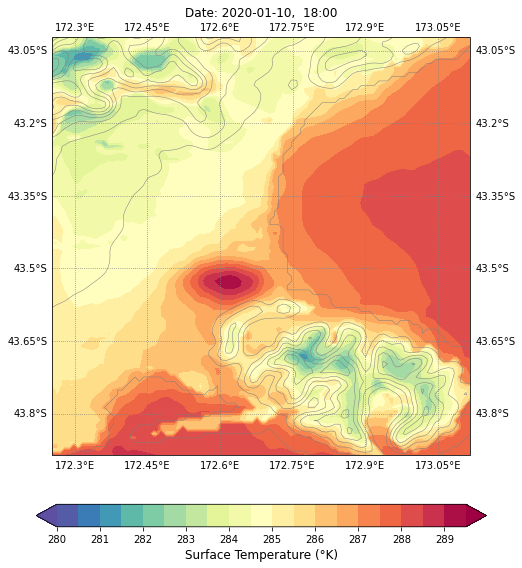

In [3]:

# Define the specific date and hour 
date = '2020-01-10'  #  your date
hour = '18'          #  your hour


# Select data for the specific date and hour
RegCM5_1km_ts = RegCM5_1km.ts.sel(time=f'{date}T{hour}:00:00')

# do slice intsead of sel to make mean of coordinate (time, longitudes... etc)
# holoview plot - interactive ??? magic 

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
#ax.coastlines(linewidth=0.5)


contour = ax.contourf(RegCM5_1km_ts.xlon, RegCM5_1km_ts.xlat, RegCM5_1km_ts, transform=ccrs.PlateCarree(), levels=np.arange(280, 290, 0.5), extend ='both', cmap="Spectral_r",  add_colorbar=False)
contour_lines = ax.contour(RegCM5_1km.xlon, RegCM5_1km.xlat, RegCM5_1km.topo, transform=ccrs.PlateCarree(), levels=np.arange(0, 1000, 100), colors='grey', linewidths=0.5)

cbar = fig.colorbar(contour, fraction=0.046, pad=0.1, orientation='horizontal')
cbar.ax.set_xlabel('Surface Temperature (°K)', fontsize=12)


# Set extent
#ax.set_extent([165, 185, -50, -35], crs=ccrs.PlateCarree())     
                           
# Title for the plot
ax.set_title(f'Date: {date},  {hour}:00')

ax.gridlines(draw_labels=True,color="grey", linestyle="dotted")


# Adjust layout and save the figure
plt.tight_layout()

#plt.savefig('TOPO_plot_new_zealand.png', dpi=400)
plt.show()


/tmp/ipykernel_987651/3080203609.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


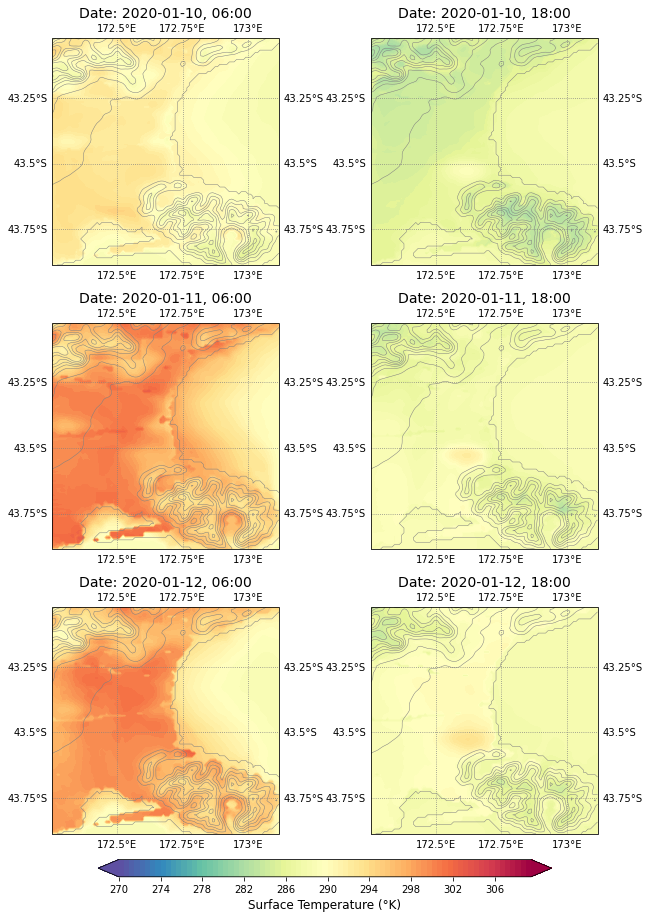

In [9]:
import os
import glob
import numpy as np
import xarray as xr
import rioxarray
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from matplotlib.cm import get_cmap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle
import cartopy
import pandas as pd
# Define the base date and times
base_date = '2020-01-10'
dates = pd.date_range(start=base_date, periods=3).strftime('%Y-%m-%d')
hours = ['06', '18']

# Create the plot
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(9, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# Iterate over each date and hour
for i, date in enumerate(dates):
    for j, hour in enumerate(hours):
        ax = axs[i, j]
        RegCM5_1km_ts = RegCM5_1km.ts.sel(time=f'{date}T{hour}:00:00')

        contour = ax.contourf(RegCM5_1km_ts.xlon, RegCM5_1km_ts.xlat, RegCM5_1km_ts, transform=ccrs.PlateCarree(), 
                              levels=np.arange(270, 310, 0.5), extend='both', cmap="Spectral_r", add_colorbar=True)
        contour_lines = ax.contour(RegCM5_1km.xlon, RegCM5_1km.xlat, RegCM5_1km.topo, transform=ccrs.PlateCarree(), 
                                   levels=np.arange(0, 1000, 100), colors='grey', linewidths=0.5)

        # Set title for the subplot
        ax.set_title(f'Date: {date}, {hour}:00', fontsize=14)

        # Add gridlines
        gl=ax.gridlines(draw_labels=True, color="grey", linestyle="dotted")

        gl.xlocator = plt.MaxNLocator(4)  # Specifies maximum number of gridlines for x-axis
        gl.ylocator = plt.MaxNLocator(4)  # Specifies maximum number of gridlines for y-axis

# Add colorbar to the figure
cbar_ax = fig.add_axes([0.15, -0.02, 0.7, 0.02])  # Position: [left, bottom, width, height]
cbar = fig.colorbar(contour, cax=cbar_ax, orientation='horizontal')
cbar.ax.set_xlabel('Surface Temperature (°K)', fontsize=12)


# Adjust layout and save the figure
plt.tight_layout()
plt.show()
#plt.savefig('surface_temperature_plots.png', dpi=400)


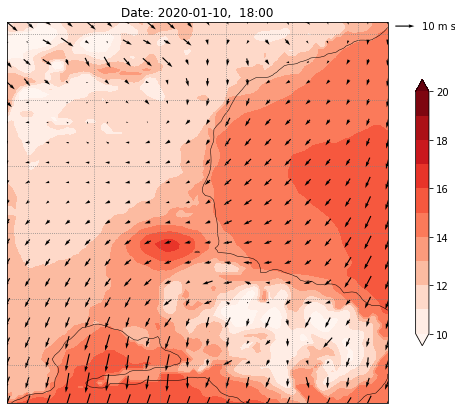

In [10]:

# Define the specific date and hour 
date = '2020-01-10'  #  your date
hour = '18'          #  your hour


# Select data for the specific date and hour
RegCM5_1km_wind = RegCM5_1km.sel(time=f'{date}T{hour}:00:00')

RegCM5_1km_ts = RegCM5_1km.ts.sel(time=f'{date}T{hour}:00:00')-273

u = RegCM5_1km_wind.uas.sel(m10=10).values
v = RegCM5_1km_wind.vas.sel(m10=10).values

x = RegCM5_1km_wind.xlon.values
y = RegCM5_1km_wind.xlat.values


# Define vmin, vmax
vmin = 10
vmax = 20



fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection= ccrs.PlateCarree())

contour = ax.contourf(RegCM5_1km_ts.xlon, RegCM5_1km_ts.xlat, RegCM5_1km_ts, transform=ccrs.PlateCarree(),levels=np.arange(vmin, vmax + 1, 1), extend ='both', cmap="Reds",  add_colorbar=False)

cbar = fig.colorbar(contour, ax=ax, shrink=0.7)



Q = plt.quiver( x, y, u, v, pivot='middle', transform=ccrs.PlateCarree(),regrid_shape=20,
                scale=200, width=0.003)
## plot quiver key
qk = plt.quiverkey(Q, 
                   1.07, 0.99,                  # x,y label position
                   10, str(10)+' '+RegCM5_1km_wind.uas.units, # choose units + update string
                   labelpos='E',                # add label to the right
                   coordinates='axes'
                   )

#Topography
contour_lines = ax.contour(RegCM5_1km.xlon, RegCM5_1km.xlat, RegCM5_1km.topo, transform=ccrs.PlateCarree(), levels=[2], colors='black', linewidths=0.5)

# Add the gridlines
ax.gridlines(draw_labels=False,color="grey", linestyle="dotted")


ax.set_title(f'Date: {date},  {hour}:00')
plt.show()



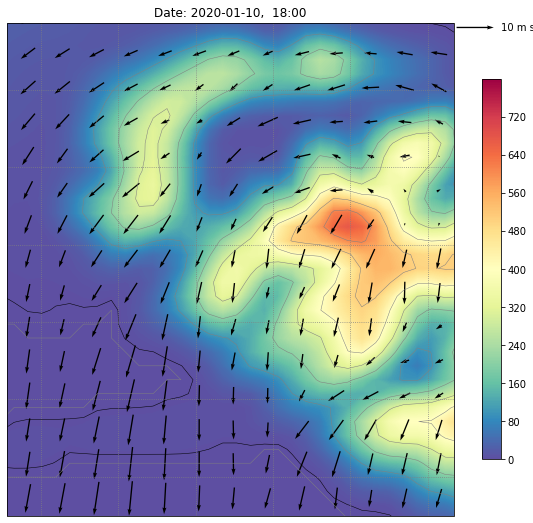

In [11]:

# Define the specific date and hour 
date = '2020-01-10'  #  your date
hour = '18'          #  your hour


# Select data for the specific date and hour
RegCM5_1km_wind = RegCM5_1km.sel(time=f'{date}T{hour}:00:00')

RegCM5_1km_ts = RegCM5_1km.ts.sel(time=f'{date}T{hour}:00:00')-273

u = RegCM5_1km_wind.uas.sel(m10=10).values
v = RegCM5_1km_wind.vas.sel(m10=10).values

x = RegCM5_1km_wind.xlon.values
y = RegCM5_1km_wind.xlat.values


# Define vmin, vmax
vmin = 10
vmax = 20



fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection= ccrs.PlateCarree())

#contour = ax.contour(RegCM5_1km_ts.xlon, RegCM5_1km_ts.xlat, RegCM5_1km_ts, transform=ccrs.PlateCarree(),levels=np.arange(vmin, vmax + 1, 1), extend ='both', cmap="Reds",  add_colorbar=False)

contour = ax.contourf(RegCM5_1km.xlon, RegCM5_1km.xlat, RegCM5_1km.topo, transform=ccrs.PlateCarree(), levels=np.arange(0, 800, 1), cmap="Spectral_r",  add_colorbar=False)
contour_lines = ax.contour(RegCM5_1km.xlon, RegCM5_1km.xlat, RegCM5_1km.topo, transform=ccrs.PlateCarree(), levels=np.arange(0, 1000, 100), colors='grey', linewidths=0.5)

cbar = fig.colorbar(contour, ax=ax, shrink=0.7)

cbar.ax.set_xlabel('Elevation (m)', fontsize=12)

Q = plt.quiver( x, y, u, v, pivot='middle', transform=ccrs.PlateCarree(),regrid_shape=40,
                scale=120, width=0.003)
## plot quiver key
qk = plt.quiverkey(Q, 
                   1.09, 0.99,                  # x,y label position
                   10, str(10)+' '+RegCM5_1km_wind.uas.units, # choose units + update string
                   labelpos='E',                # add label to the right
                   coordinates='axes'
                   )

#Topography
contour_lines = ax.contour(RegCM5_1km.xlon, RegCM5_1km.xlat, RegCM5_1km.topo, transform=ccrs.PlateCarree(), levels=[2], colors='black', linewidths=0.5)

# Add the gridlines
ax.gridlines(draw_labels=False,color="grey", linestyle="dotted")
inset_extent = [172.5282, 172.8168, -43.8752, -43.5563]
ax.set_extent(inset_extent, crs=ccrs.PlateCarree())
ax.set_title(f'Date: {date},  {hour}:00')
plt.show()



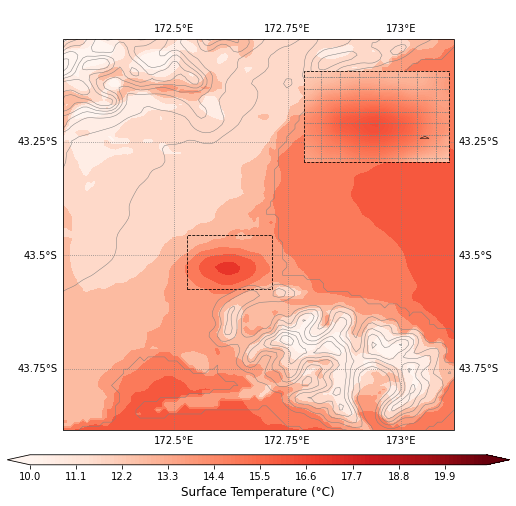

In [13]:

# Define the specific date and hour 
date = '2020-01-10'  #  your date
hour = '18'          #  your hour



RegCM5_1km_ts = RegCM5_1km.ts.sel(time=f'{date}T{hour}:00:00')-273


# Define vmin, vmax
vmin = 10
vmax = 20

inset_extent = [172.5282, 172.7168, -43.5752, -43.4563]


# Create subplots with Orthographic projection
fig, ax = plt.subplots(1, 1, figsize=[9, 9], subplot_kw={'projection': ccrs.PlateCarree()})

contour = ax.contourf(RegCM5_1km_ts.xlon, RegCM5_1km_ts.xlat, RegCM5_1km_ts, transform=ccrs.PlateCarree(),levels=np.arange(vmin, vmax + 1, 1), extend ='both', cmap="Reds",  add_colorbar=False)

contour_lines = ax.contour(RegCM5_1km.xlon, RegCM5_1km.xlat, RegCM5_1km.topo, transform=ccrs.PlateCarree(), levels=np.arange(0, 1000, 100), colors='grey', linewidths=0.5)

ax.set_title(f" {date}", fontsize=14)
gl=ax.gridlines(draw_labels=True,color="grey", linestyle="dotted")
rect = Rectangle((inset_extent[0], inset_extent[2]), inset_extent[1] - inset_extent[0], inset_extent[3] - inset_extent[2],
                 linewidth=0.8, edgecolor='black', facecolor='none', transform=ccrs.PlateCarree(),linestyle="--")
ax.add_patch(rect)

axins = inset_axes(ax, width="37%", height="37%", loc='upper right', borderpad=0.5, axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=ccrs.PlateCarree()))


contour = axins.contourf(RegCM5_1km_ts.xlon, RegCM5_1km_ts.xlat, RegCM5_1km_ts, transform=ccrs.PlateCarree(),levels=np.arange(vmin, vmax + 1, 0.1), extend ='both', cmap="Reds",  add_colorbar=False)



ax.set_title(f" ", fontsize=14)
axins.set_extent(inset_extent, crs=ccrs.PlateCarree())
contour_lines = axins.contour(RegCM5_1km.xlon, RegCM5_1km.xlat, RegCM5_1km.topo, transform=ccrs.PlateCarree(), levels=[2], colors='black', linewidths=0.5)


axins.gridlines(draw_labels=False, color="grey", linestyle="dotted")



gl1 = axins.gridlines(draw_labels=False, linewidth=1, color='grey', alpha=0.8,linestyle="dotted")
axins.set_title('', fontsize=14)

# Customize the bounding box of the inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.8)
    spine.set_linestyle('--')# Adjust the width as needed


gl.xlocator = plt.MaxNLocator(4)  # Specifies maximum number of gridlines for x-axis
gl.ylocator = plt.MaxNLocator(4)  # Specifies maximum number of gridlines for y-axis

cbar =plt.colorbar(contour, ax=ax, orientation='horizontal', pad=0.05, aspect=50)
cbar.ax.set_xlabel('Surface Temperature (°C)', fontsize=12)
plt.show()


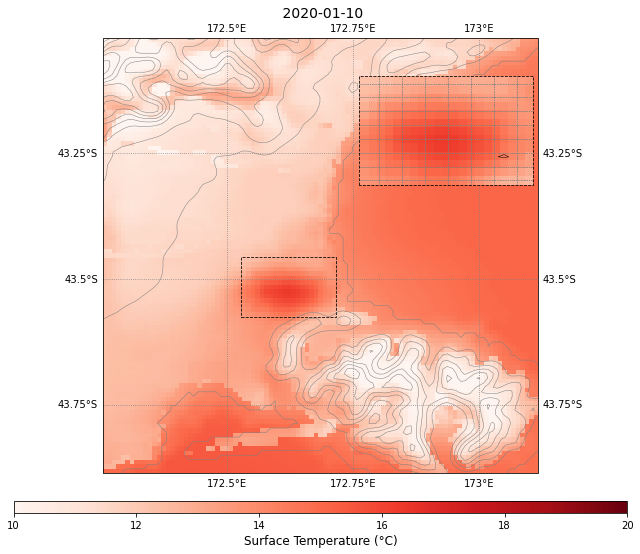

In [14]:


# Define the specific date and hour
date = '2020-01-10'  # your date
hour = '18'          # your hour

RegCM5_1km_ts = RegCM5_1km.ts.sel(time=f'{date}T{hour}:00:00') - 273

# Define vmin, vmax
vmin = 10
vmax = 20

inset_extent = [172.5282, 172.7168, -43.5752, -43.4563]

# Create subplots with PlateCarree projection
fig, ax = plt.subplots(1, 1, figsize=[11, 10], subplot_kw={'projection': ccrs.PlateCarree()})

img = ax.imshow(RegCM5_1km_ts, extent=[RegCM5_1km_ts.xlon.min(), RegCM5_1km_ts.xlon.max(),
                                       RegCM5_1km_ts.xlat.min(), RegCM5_1km_ts.xlat.max()],
                transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap="Reds", origin='lower')

contour_lines = ax.contour(RegCM5_1km.xlon, RegCM5_1km.xlat, RegCM5_1km.topo, transform=ccrs.PlateCarree(), 
                           levels=np.arange(0, 1000, 100), colors='grey', linewidths=0.5)

ax.set_title(f" {date}", fontsize=14)
gl=ax.gridlines(draw_labels=True, color="grey", linestyle="dotted")

rect = Rectangle((inset_extent[0], inset_extent[2]), inset_extent[1] - inset_extent[0], inset_extent[3] - inset_extent[2],
                 linewidth=0.8, edgecolor='black', facecolor='none', transform=ccrs.PlateCarree(), linestyle="--")
ax.add_patch(rect)

axins = inset_axes(ax, width="40%", height="40%", loc='upper right', borderpad=0.5, 
                   axes_class=cartopy.mpl.geoaxes.GeoAxes, axes_kwargs=dict(map_projection=ccrs.PlateCarree()))

axins.imshow(RegCM5_1km_ts, extent=[RegCM5_1km_ts.xlon.min(), RegCM5_1km_ts.xlon.max(),
                                    RegCM5_1km_ts.xlat.min(), RegCM5_1km_ts.xlat.max()],
             transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap="Reds", origin='lower')

axins.set_extent(inset_extent, crs=ccrs.PlateCarree())

contour_lines = axins.contour(RegCM5_1km.xlon, RegCM5_1km.xlat, RegCM5_1km.topo, transform=ccrs.PlateCarree(), 
                              levels=[2], colors='black', linewidths=0.5)

axins.gridlines(draw_labels=False, color="grey", linestyle="dotted")

gl1 = axins.gridlines(draw_labels=False, linewidth=1, color='grey', alpha=0.8, linestyle="dotted")

# Customize the bounding box of the inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.8)
    spine.set_linestyle('--')  # Adjust the width as needed


gl.xlocator = plt.MaxNLocator(4)  # Specifies maximum number of gridlines for x-axis
gl.ylocator = plt.MaxNLocator(4)  # Specifies maximum number of gridlines for y-axis


cbar =plt.colorbar(img, ax=ax, orientation='horizontal', pad=0.05, aspect=50)
cbar.ax.set_xlabel('Surface Temperature (°C)', fontsize=12)

plt.show()


In [ ]:
## Testing 123